# Regresja wielomianowa

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression 
from sklearn.preprocessing import PolynomialFeatures

In [2]:
dane = pd.read_csv('04_mieszkania.csv')
X = dane.iloc[:, 0:1].values # kolumna pierwasza 
y = dane.iloc[:, -1].values # kolumna ostatnia

In [3]:
# Zamiana danych wejściowych na wielomiany
# wiel = PolynomialFeatures(degree=4) # degree -> stopień wielomianu (hiperparametr)
wiel = PolynomialFeatures(degree=4, interaction_only=False, include_bias=True, order='C') # degree -> stopień wielomianu (hiperparametr)
# degree -> Określa najwyższy stopień, do którego cechy będą przekształcane. Na przykład, jeśli degree=2, to przekształcimy cechy do drugiego stopnia
# interaction_only -> Jeśli ustawione na True, przekształcenie obejmuje tylko interakcje między cechami, czyli wyklucza cechy samoczynnie przekształcone
# include_bias -> Dodaje kolumnę z jedynkami, która reprezentuje stałą cechę. Jest to przydatne w modelach regresji, aby uwzględnić intercept (punkt przecięcia).
# order -> Określa, czy funkcje wyjściowe powinny być generowane w kolejności C-style (rzędami) czy Fortran-style (kolumnami). 'C' lub 'F'.

X_wiel = wiel.fit_transform(X) 
# print(X)
# print(X_wiel)

In [4]:
model = LinearRegression() 
model.fit(X_wiel, y)

LinearRegression()

In [5]:
# Wizualizacja polega na stworzeniu tablicy X-ów na tyle gęstych żeby było widać dokładny przebieg krzywej modelu, (ilość punktów X = (max(X)-min(X)/2))
# X_in = np.arange(np.min(X), np.max(X), 0.1) # wygenerowanie X wejściowych o gęstości co 0.1, w zakresie danych wejściowych między min(X) - max(X)
X_in = np.linspace(np.min(X), np.max(X), int((np.max(X)-np.min(X))/2)) # wygenerowanie X wejściowych w zakresie danych wejściowych między min(X) - max(X)
X_in = X_in.reshape(-1, 1) # konwersja do tablicy dwuwymiarowej
X_wiel = wiel.fit_transform(X_in) # transformacja na wielomiany, ponieważ model był uczony na wielomianach, to prognoza też musi być obliczna na wielomianach
prognoza = model.predict(X_wiel) # wyliczenie przez model prognozy, jako dane wejściowe 

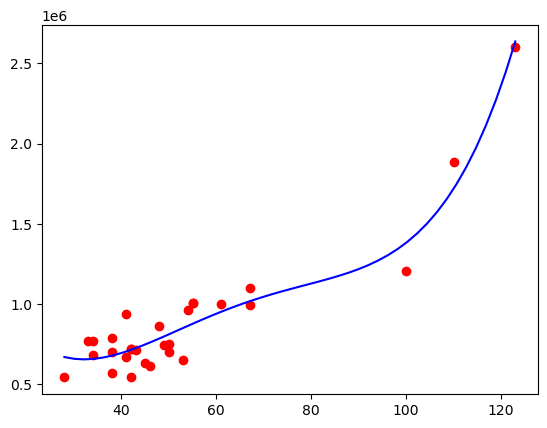

In [6]:
plt.scatter(X, y, color='red') 
plt.plot(X_in, prognoza, color='blue') 
plt.show()

In [7]:
# prognozy dla jednej danej wejściowej
X_in = [[95]] # można naraz wyłuskać więcej danych np.[[21],[76],[34]]
X_wiel = wiel.fit_transform(X_in) # transformacja na wielomiany, ponieważ model był uczony na wielomianach, to prognoza też musi być obliczna na wielomianach
prognoza = model.predict(X_wiel) # wyliczenie przez model prognozy, jako dane wejściowe 
print(X_in, prognoza)

[[95]] [1283790.52689953]
